# **WARNING**

In order for this notebook to run, you must first run the notebook `1_0_generate_noturn_data.ipynb` and generate the file `result/singlegame_results/player10_noturn_results.csv` which contains the optimal policy and value functions for the solved MDPs for different player skill model and epsilon combinatinos. It is also important to make sure that all combinations you want to analyse in this file were generated during this process. 

# 1.0 Notebook Parameters

Please specify the following variables:
1. `project_directory`: your project directory path
2. `epsilon_list`: the list of execution error multiplers (epsilon) that you want to consider in your analysis.
3. `player_id`: the players (i.e. skill model) you want to consider in your analysis; use one base model and scale it with different epsilons; this should match whatever was used in `1_0_generate_noturn_data.ipynb`.

In [2]:

# Change this to the project directory path for your computer  
project_directory = '/Users/rachael/Desktop/darts-thesis'
project_directory = '/Users/Craig/PycharmProjects/darts-thesis'

# Set the epsilons that will be considered in this analysis 
epsilon_list = [1,2,3,4,5,6,7,8,9]

# Set the ID of the player skill models you want to use 
    # 10 - symmetric DB skill model that we were using up until now 
    # "AVG" - "average pro" skill model generated by H & W 
player_id = "AVG"


# 2.0 Notebook Setup

Import libraries and run prerequisites.

In [3]:
# Import and configure modules from this project

import os

os.chdir(project_directory)

import function_init_simple_mdp as imdp

In [4]:
# Import and configure external modules

import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=300)
np.set_printoptions(threshold=300)

import pandas as pd

# Plotting 
import matplotlib.pyplot as plt
from matplotlib import cm, colors

import seaborn as sns
#sns.set_theme()   # uncomment this if you want seasborn theme

def color_map_color(value, cmap_name='Wistia', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = colors.rgb2hex(rgb)
    return color


# 3.0 Load Data

In [13]:
# Load data
df = pd.read_csv('result/singlegame_results/playerAVG_noturn_results.csv')
df = df.loc[df.player==player_id]

# Read only the relevant columns - note that this will result in duplicates if you include multiple players 
df = df[['epsilon','tokens','score','optimal_value','optimal_policy']]

# Map to policy action names 
a_map = {i:imdp.a_list[i] for i in range(len(imdp.a_list))}
df['optimal_policy_name'] = df['optimal_policy'].map(a_map)

# 4.0 Plot Value Function (No Tokens)

In [14]:
# Create dataframe for values where player has no tokens
df0 = df.loc[df.tokens==0].copy()

# Create dataframes for optimal values at each score for different epsilons 
epsilon_dfs = []

for e in range(len(epsilon_list)):
    epsilon = epsilon_list[e]
    temp = df0.loc[df0.epsilon==epsilon].set_index('score')['optimal_value'].copy()
    epsilon_dfs.append(temp)


C:\Users\Craig\AppData\Local\Temp\ipykernel_14784\1094862524.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # PiYG


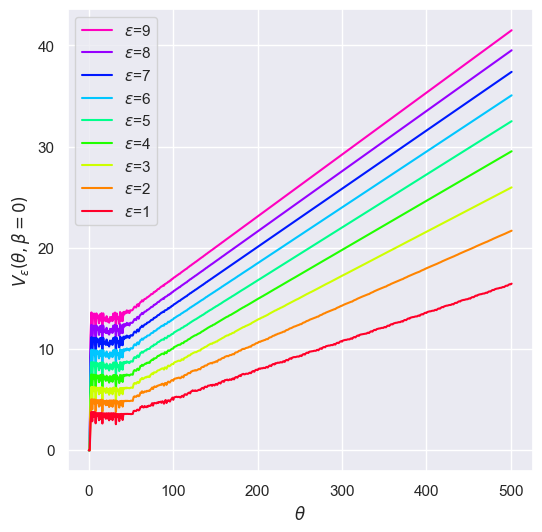

In [15]:
# Housekeeping 
e_leg = [] # Create a placeholder list for legend 
vmax=max(epsilon_list) # Set max epsilon for color scale
vmin=min(epsilon_list) # Set min epsilon for color scale

# Set figure size
fig = sns.set(rc={'figure.figsize':(6,6)})

# Plot line for each epsilon value 
for e in reversed(range(len(epsilon_list))): # reverse order so legend is more intuitive
    epsilon=epsilon_list[e] # get actual epsilon value  
    e_leg.append('$\epsilon$={}'.format(epsilon)) # append the current epsilon to the legend list
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax) # get the color for current epsilon 
    fig = plt.plot(epsilon_dfs[e],color=color) # plot the line 


# Legend and axis labels
fig = plt.legend(e_leg) # plot the legend 
fig = plt.xlabel(r'$\theta$')
fig = plt.ylabel(r'$V_{\epsilon}(\theta,\beta=0)$')

# Uncomment for black dotted line at epsilon 1's V(501,0)
# fig = plt.axhline(epsilon_dfs[0][501],color='black',linestyle='dotted') 

# 5.0 Plot Value Function (Tokens)

In [16]:
# Get dataframe only for score values at 501 
df_501 = df.loc[df.score==501]

# Create dataframes for values at 501 for each token value 
epsilon_dfs = []

for e in range(len(epsilon_list)):
    epsilon = epsilon_list[e]
    temp = df_501.loc[df_501.epsilon==epsilon].set_index('tokens')['optimal_value'].copy()
    epsilon_dfs.append(temp)

C:\Users\Craig\AppData\Local\Temp\ipykernel_14784\1094862524.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # PiYG


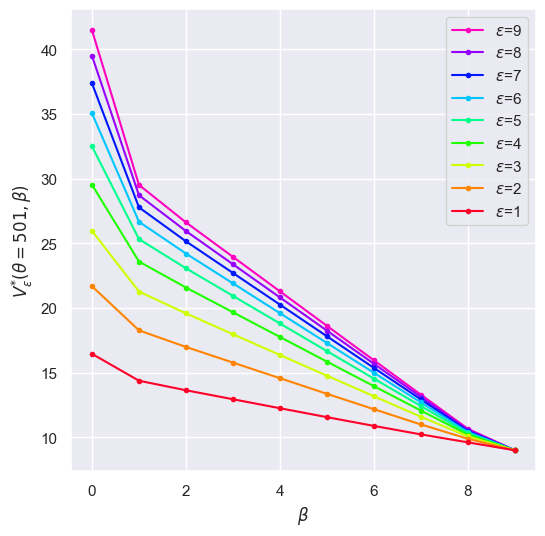

In [17]:
# Housekeeping 
e_leg = [] # Create a placeholder list for legend 
vmax=max(epsilon_list) # Set max epsilon for color scale
vmin=min(epsilon_list) # Set min epsilon for color scale

# Set figure size
fig = sns.set(rc={'figure.figsize':(6,6)})

# Plot line for each epsilon value 
for e in reversed(range(len(epsilon_list))):
    epsilon = epsilon_list[e]
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    e_leg.append(r'$\epsilon$={}'.format(epsilon))
    fig = plt.plot(epsilon_dfs[e],marker ='.',color=color)

# Legend and axis labels
fig = plt.xlabel(r'$\beta$')
fig = plt.ylabel(r'$V_{\epsilon}^{*}(\theta=501,\beta)$')
fig = plt.legend(e_leg)

# Uncomment for black dotted line at epsilon 1's V(501,0)
# fig = plt.axhline(epsilon_dfs[0][0],color='black',linestyle='dotted')